In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Overfitting en árboles de decisión

In [2]:
def gaussian_XOR(n1=250,n2=250,mean=0.5,std=0.3):
    rng = np.random.RandomState(0)
    first_cuadrant = rng.normal(loc=[mean,mean],scale=std,size=(n1,2))
    second_cuadrant = rng.normal(loc=[-mean,mean],scale=std,size=(n2,2))
    third_cuadrant = rng.normal(loc=[-mean,-mean],scale=std,size=(n1,2))
    fourth_cuadrant = rng.normal(loc=[mean,-mean],scale=std,size=(n2,2))
    x_train = np.vstack((
        first_cuadrant,
        second_cuadrant,
        third_cuadrant,
        fourth_cuadrant))
    y_train = np.hstack((np.zeros(n1),np.ones(n2),np.zeros(n1),np.ones(n2)))
    x_test = rng.uniform(low=-1.0,high=1.0,size=((n1+n2),2))
    y_test = np.logical_xor(x_test[:,0]>0,x_test[:,1]>0)
    return x_train, y_train, x_test, y_test
    

Generamos un conjunto de entrenamiento y de pruebas considerando un XOR. En el caso de el conjunto de entrenamiento se obtienen los datos desde una distribución normal, para así agregar ruido entre los cuadrantes.

In [3]:
x_train, y_train, x_test, y_test = gaussian_XOR()

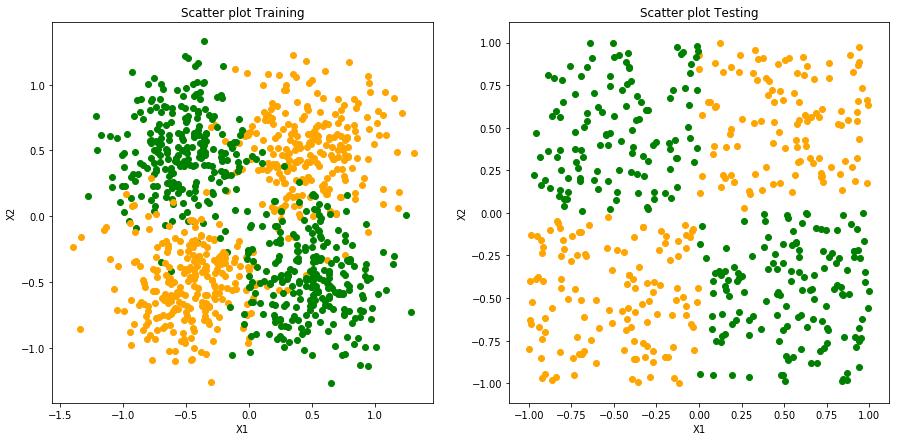

In [4]:
plt.figure(figsize=(15,7))
plt.subplot(121)
plt.title("Scatter plot Training")
plt.xlabel("X1")
plt.ylabel("X2")
for i in range(len(x_train)):
    if y_train[i] == 0:
        plt.scatter(x_train[i,0],x_train[i,1], c="orange")
    else:
        plt.scatter(x_train[i,0],x_train[i,1], c="green")
plt.subplot(122)
plt.title("Scatter plot Testing")
plt.xlabel("X1")
plt.ylabel("X2")
for i in range(len(x_test)):
    if y_test[i] == 0:
        plt.scatter(x_test[i,0],x_test[i,1], c="orange")
    else:
        plt.scatter(x_test[i,0],x_test[i,1], c="green")
plt.show()

In [5]:
def visualize_border(model,x_train,y_train,x_test,y_test,title=""):
    fig, axis = plt.subplots(1, 2,figsize=(30, 20))

    axis[0].scatter(x_train[:,0], x_train[:,1], s=50, c=y_train, cmap=plt.cm.winter)
    h = .02 # step size in the mesh
    x_min, x_max = x_train[:, 0].min() - 1, x_train[:, 0].max() + 1
    y_min, y_max = x_train[:, 1].min() - 1, x_train[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]) #or predict_proba
    Z = Z.reshape(xx.shape)
    Zplot = Z > 0.5

    axis[0].scatter(x_train[:,0],x_train[:,1],s=50,c=y_train,zorder=10,cmap=plt.cm.winter)
    axis[0].contour(xx, yy, Z,levels=[-1, 0, 1])
    axis[0].pcolormesh(xx, yy, Zplot ,cmap=plt.cm.YlGn)
    axis[1].contour(xx, yy, Z,levels=[-1, 0, 1])
    axis[1].pcolormesh(xx, yy, Zplot ,cmap=plt.cm.YlGn)
    
    axis[1].scatter(x_test[:,0], x_test[:,1], s=50, c=y_test, cmap=plt.cm.winter)
    h = .02 # step size in the mesh
    x_min, x_max = x_test[:, 0].min() - 1, x_test[:, 0].max() + 1
    y_min, y_max = x_test[:, 1].min() - 1, x_test[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]) #or predict_proba
    Z = Z.reshape(xx.shape)
    Zplot = Z > 0.5

    axis[1].scatter(x_test[:,0],x_test[:,1],s=50,c=y_test,zorder=10,cmap=plt.cm.winter)
   
    plt.title(title)
    plt.show()

In [6]:
from sklearn.tree import DecisionTreeClassifier as Tree
from ipywidgets import interactive

def train_model_tree(param):
    model = Tree()
    print("Depth= ",param)
    model.set_params(max_depth=param,criterion='gini',splitter='best')
    model.fit(x_train,y_train)
    print("Test Accuracy: ",model.score(x_test,y_test))
    return model

def visualize_border_interactive_tree(param):
    model = train_model_tree(param)
    visualize_border(model,x_train,y_train,x_test,y_test) #here choose train/test or both!

p_min = 1 #define your range
p_max = 40 #define your range
interactive(visualize_border_interactive_tree,param=(p_min,p_max))

interactive(children=(IntSlider(value=20, description='param', max=40, min=1), Output()), _dom_classes=('widge…